<a href="https://colab.research.google.com/github/Jaivy9/Celebal_Portugese_Bank_TM_ETE/blob/main/Bank_Marketing_Jaimeen_Vyas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

## MLFlow

MLflow is an open-source platform developed by Databricks that helps manage the end-to-end machine learning lifecycle. It provides tools for tracking experiments, packaging code, sharing models, and deploying them into production. MLflow is designed to improve collaboration and reproducibility in machine learning projects.

In [ ]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.7-py3-none-any.whl size=143860 sha256=61dc00211cc00d158e7da720d6b4545cc685de7087eff24f0788a90a8b876586
  Stored in directory: /root/.cache/pip/wheels/ae/63/93/5402c1a09c1868a59d0b05013484e07af97a9d7b3dbd5bd39a
Successfully built databricks-cli


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
import mlflow
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score,silhouette_score,silhouette_samples,confusion_matrix
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from joblib import parallel_backend
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
import pickle
from google.colab import files
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
import matplotlib.cm as cm
%matplotlib inline

# Reading Dataset

In [ ]:
df=pd.read_csv('bank.csv')

In [ ]:
df

age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may      1042         1     -1         0  unknown   
1       unknown    5   may      1467         1     -1         0  unknown   
2       unknown    5   may      1389         1     -1         0  unknown   
3       unknown    5   may       579         1     -1         0  unknown   
4       unknown    5   may       673         2     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr       257         1     -1         0  unknown   
11158   unknown   16   jun        83         4     -1         0  unknown   
11159  cellular   19   aug       156         2     -1         0  unknown   
11160  cellular    8   may         9         2    172         5  failure   
11161  cellular    9   jul       628         1     -1         0  unknown   

      deposit  
0         yes  
1         yes  
2         yes  
3         yes  
4         yes  
...       ...  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no  

[11162 rows x 17 columns]

# Data Types and Statistics

In [ ]:
df.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())
    print(len(df[col].unique()))
    print()

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
12

marital
['married' 'single' 'divorced']
3

education
['secondary' 'tertiary' 'primary' 'unknown']
4

default
['no' 'yes']
2

housing
['yes' 'no']
2

loan
['no' 'yes']
2

contact
['unknown' 'cellular' 'telephone']
3

month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
12

poutcome
['unknown' 'other' 'failure' 'success']
4

deposit
['yes' 'no']
2



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [ ]:
df.default.value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [ ]:
df.pdays.value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: pdays, Length: 472, dtype: int64

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# EDA

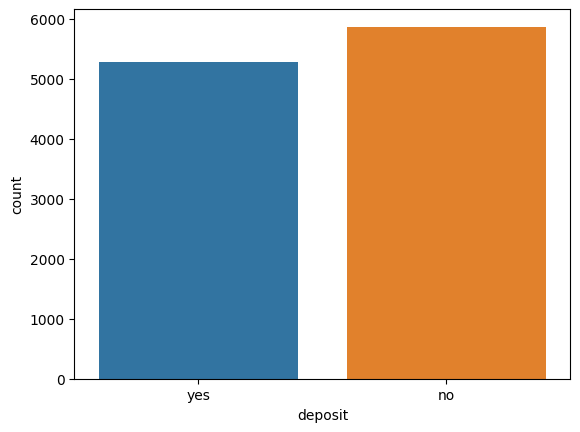

In [ ]:
sns.countplot(x='deposit',data=df)
plt.show()

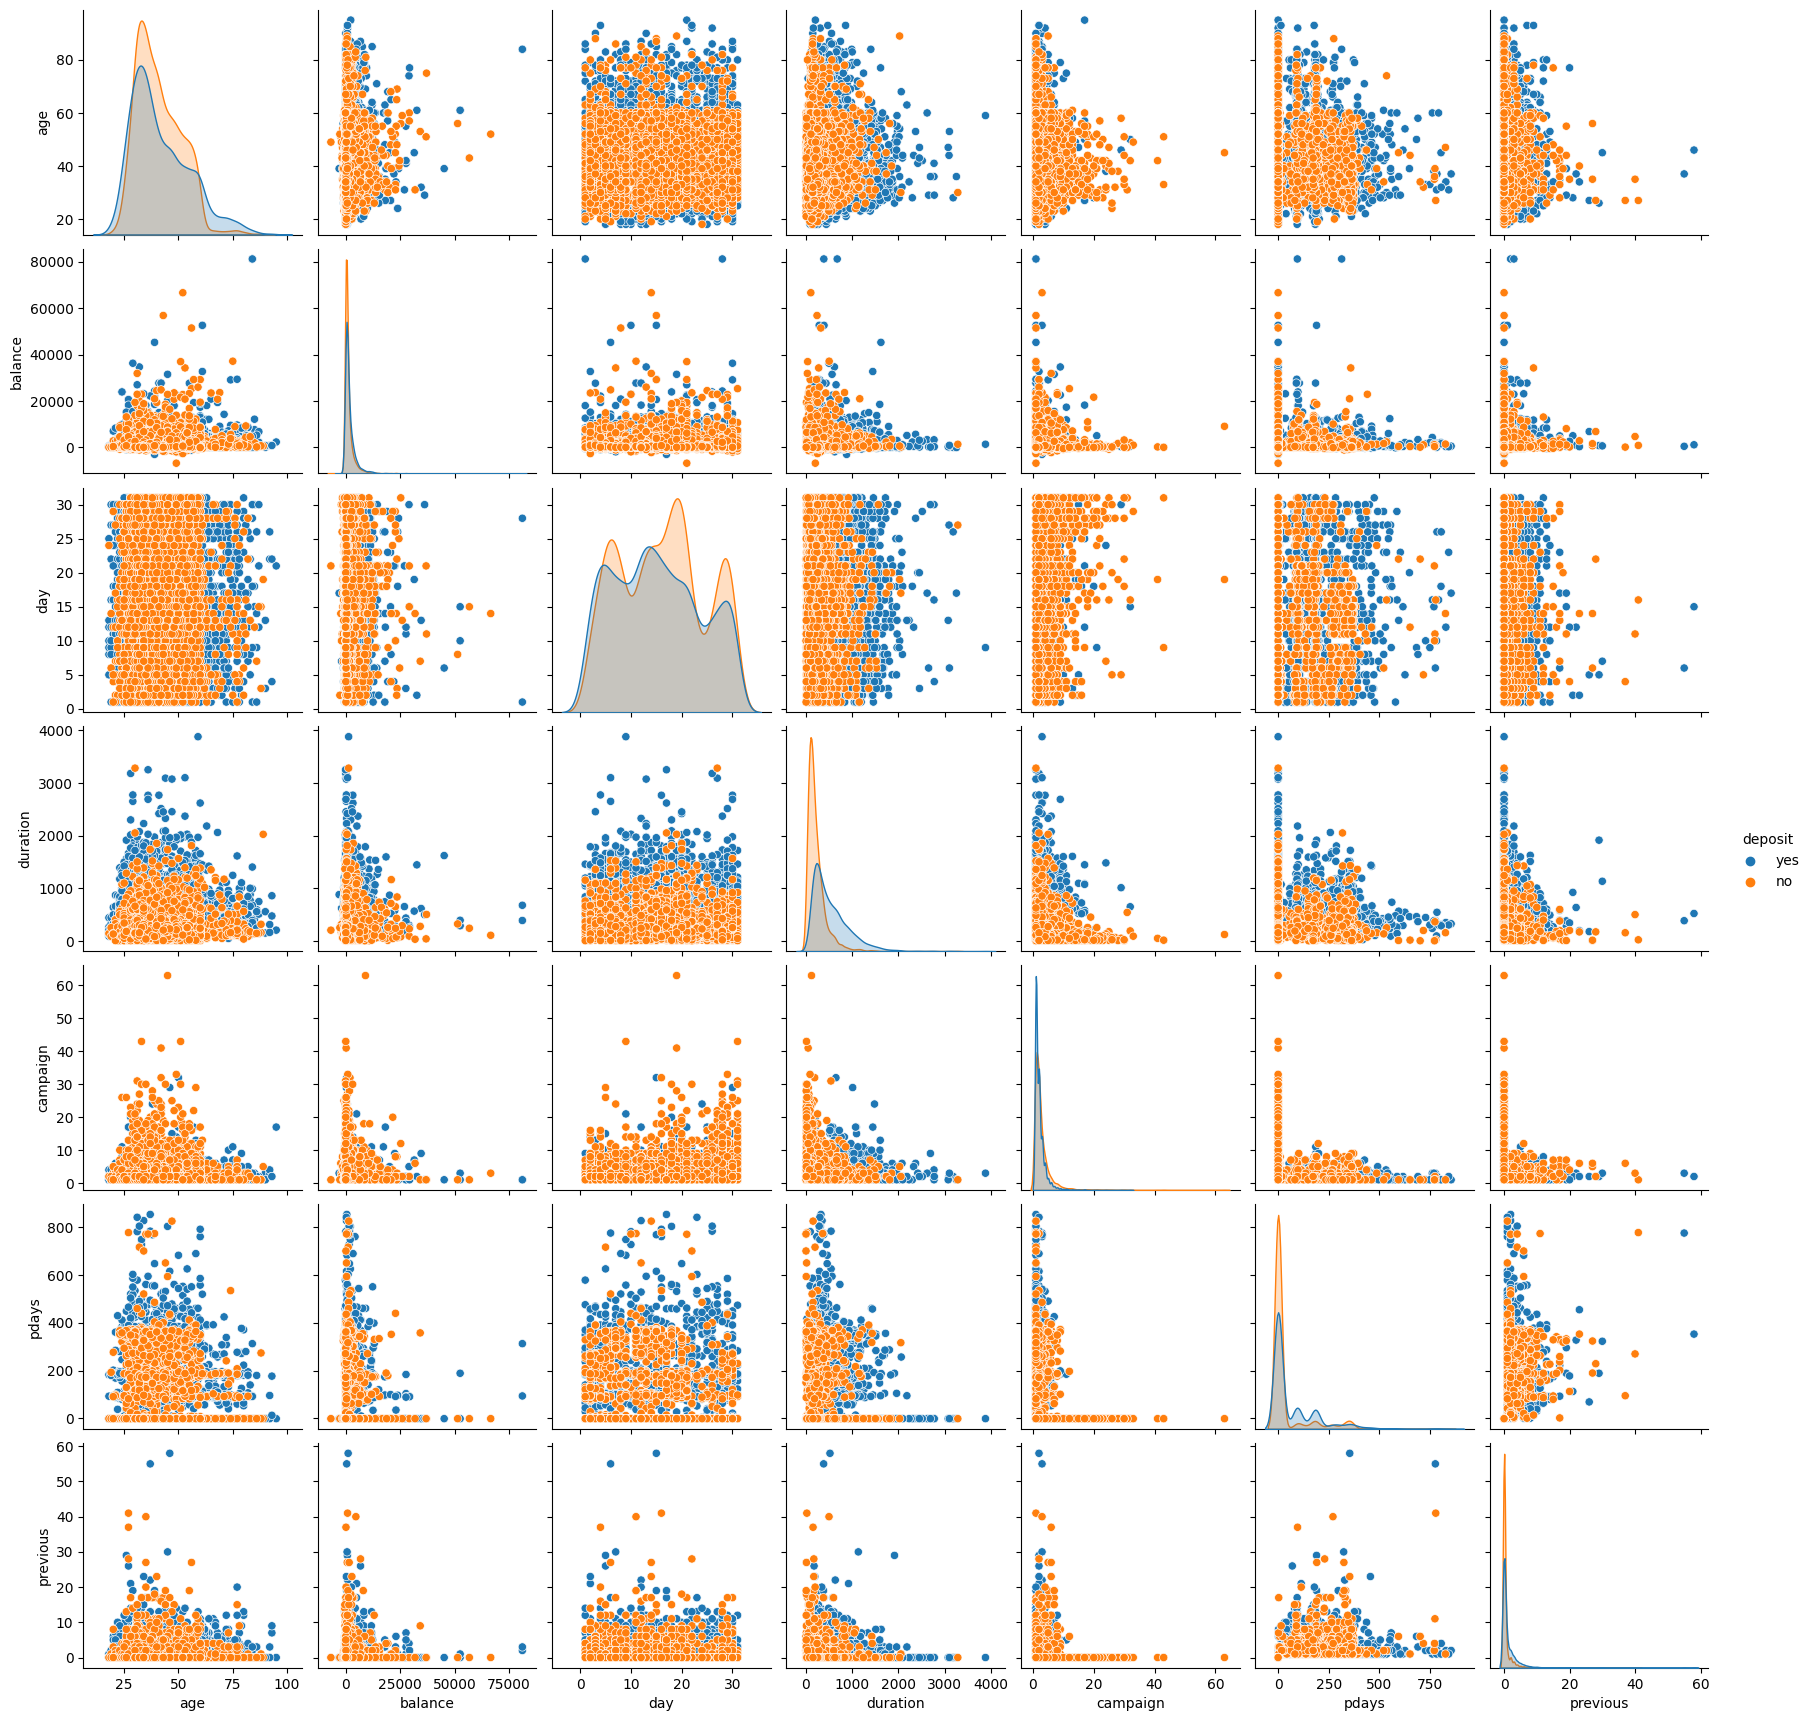

In [ ]:
sns.pairplot(df, hue='deposit')

In [ ]:
# categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]

In [ ]:
categorical_cols=[feature for feature in df.columns if ((df[feature].dtypes=='O'))]

In [ ]:
# categorical_features

In [ ]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

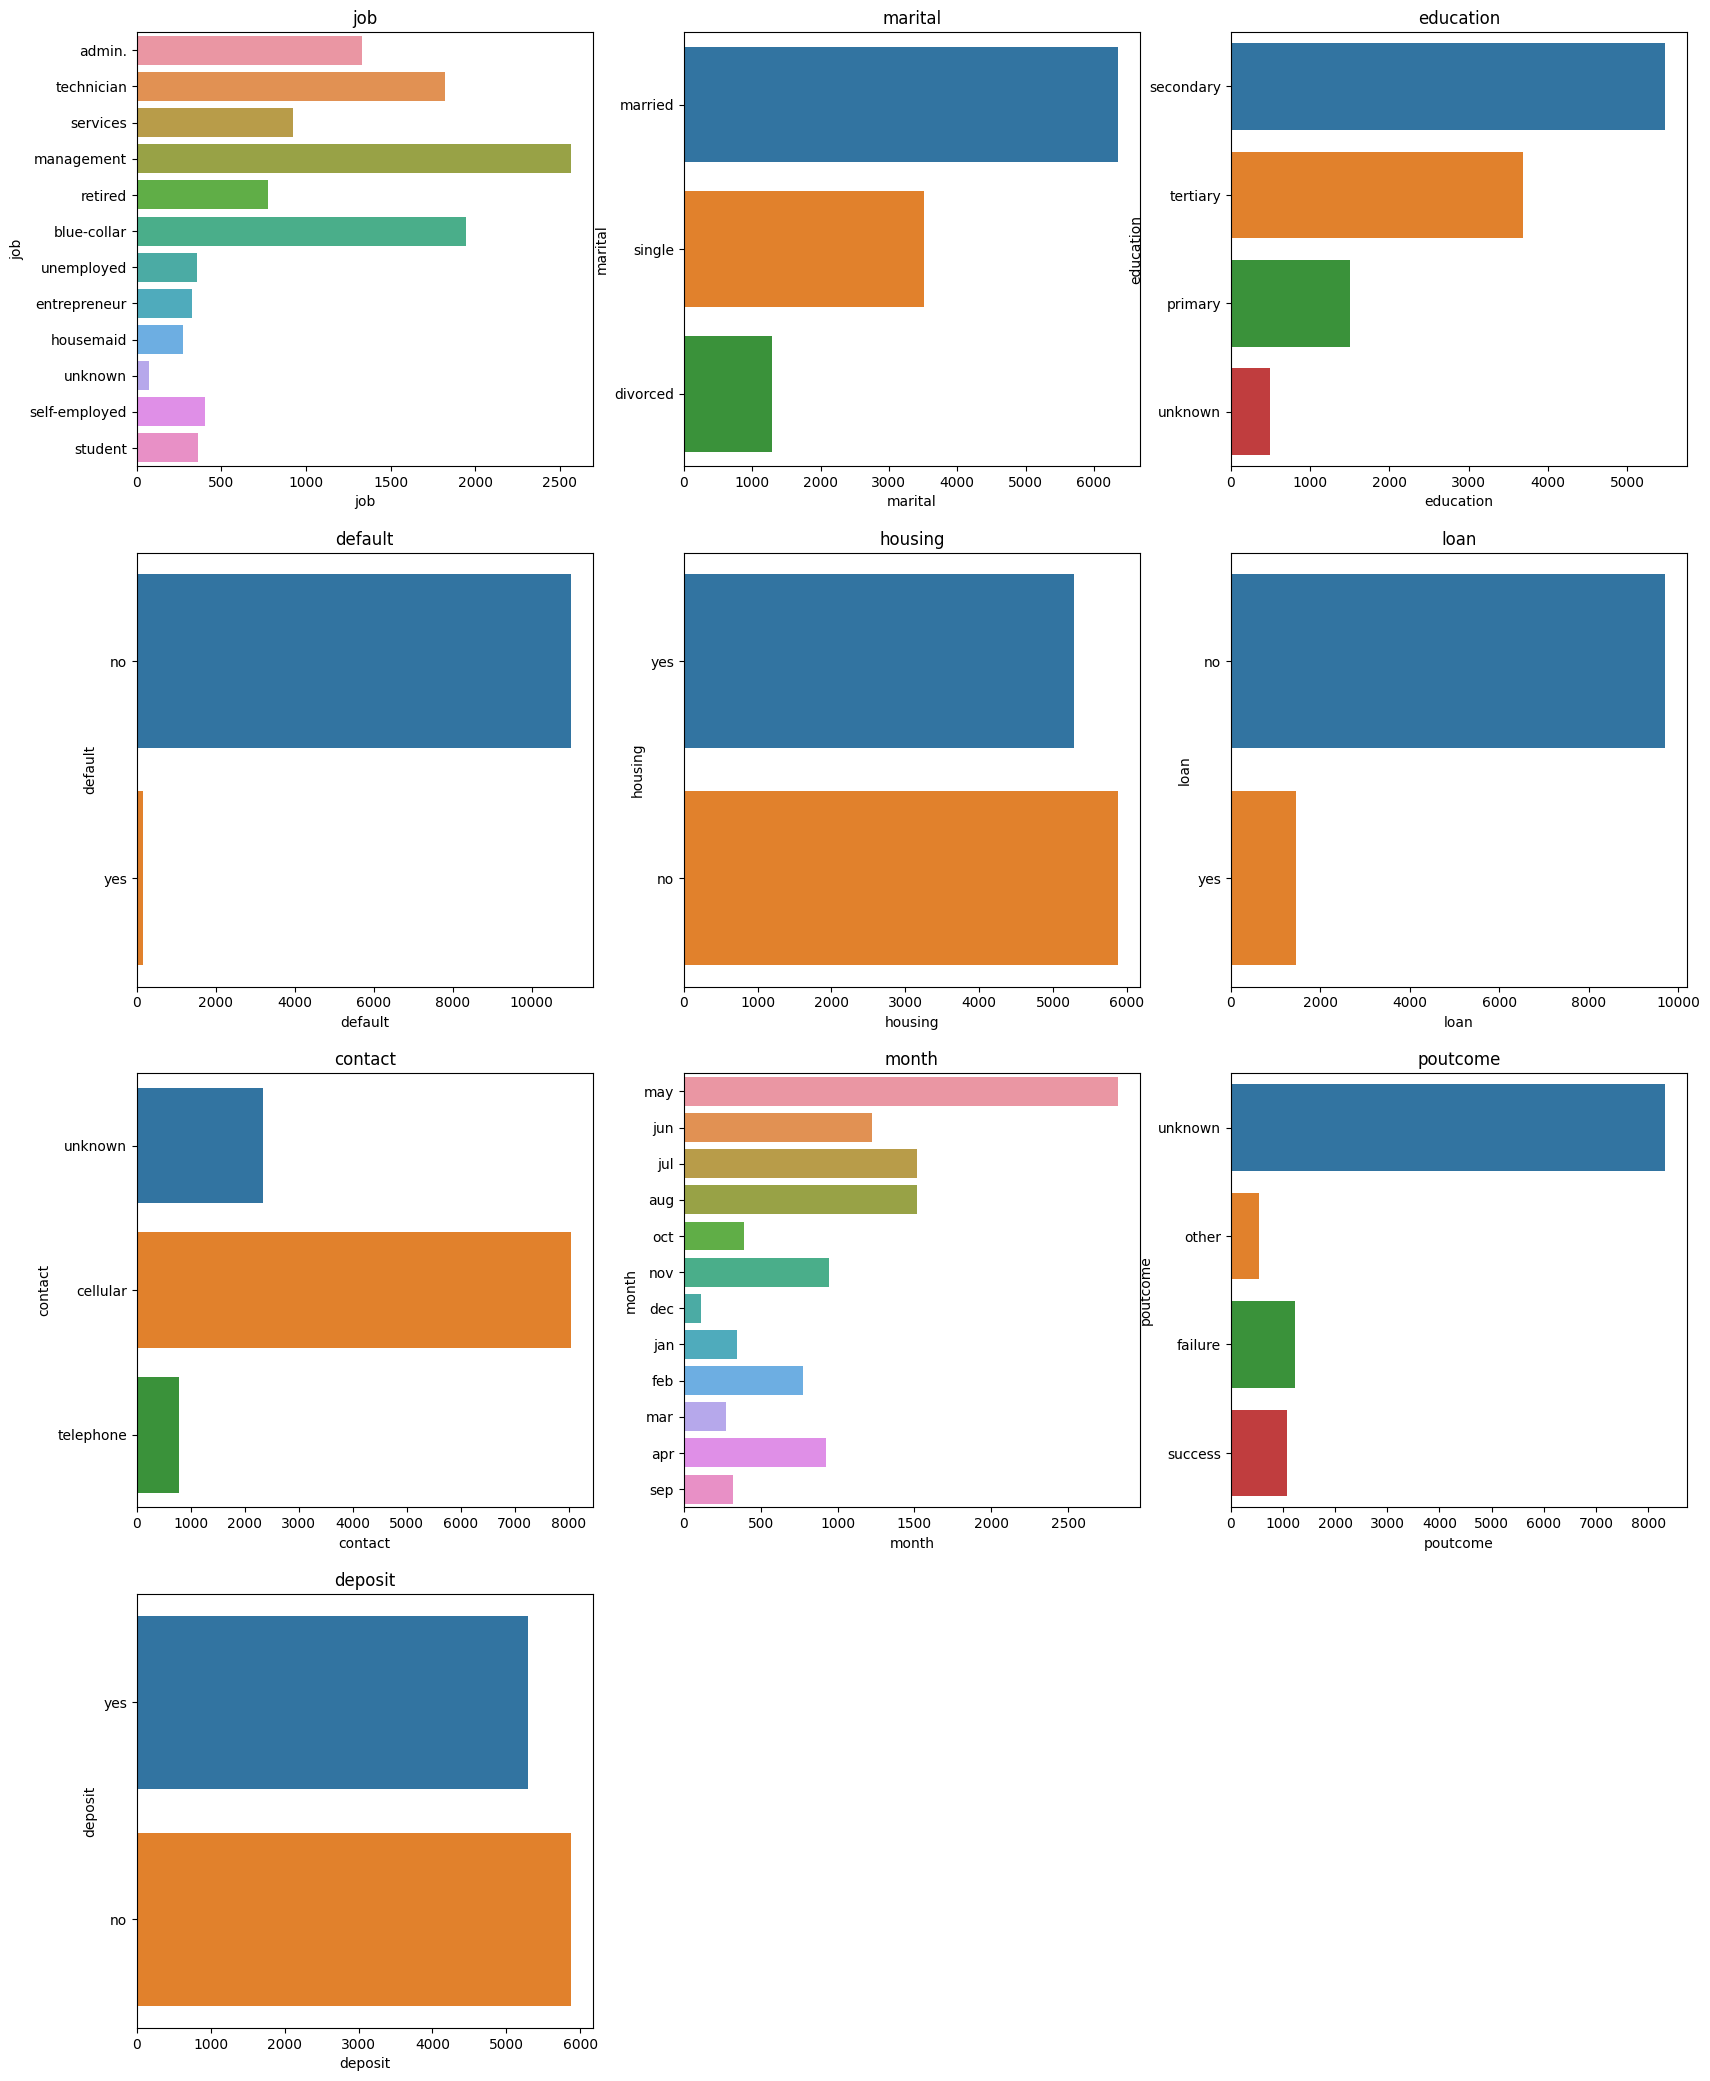

In [ ]:

#check count based on categorical features
plt.figure(figsize=(20,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

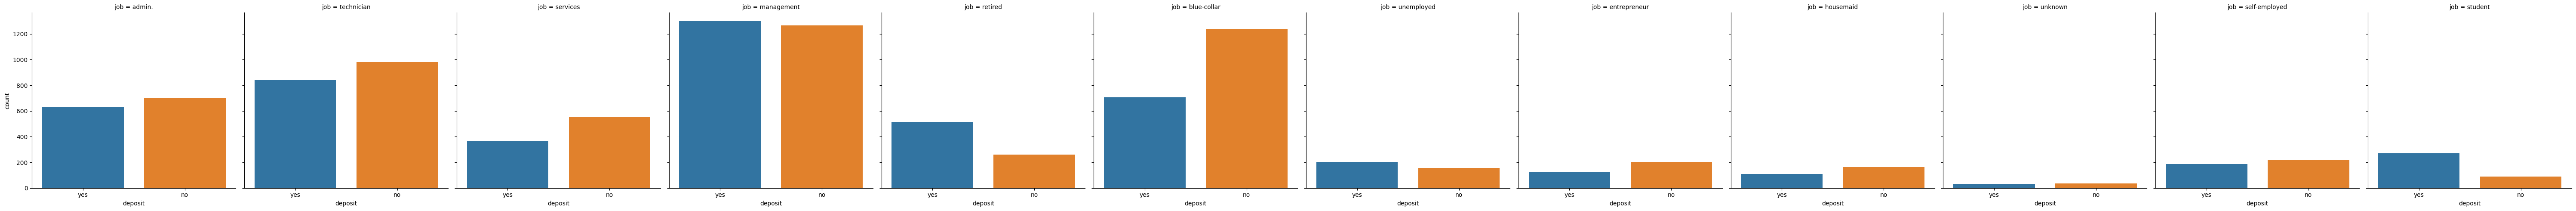

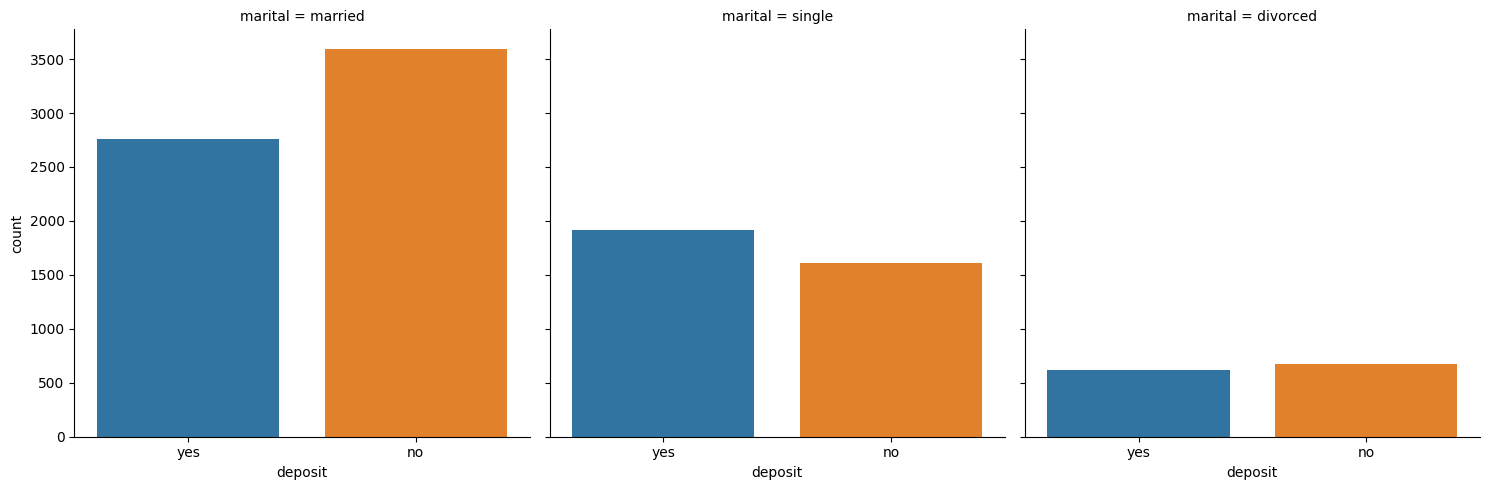

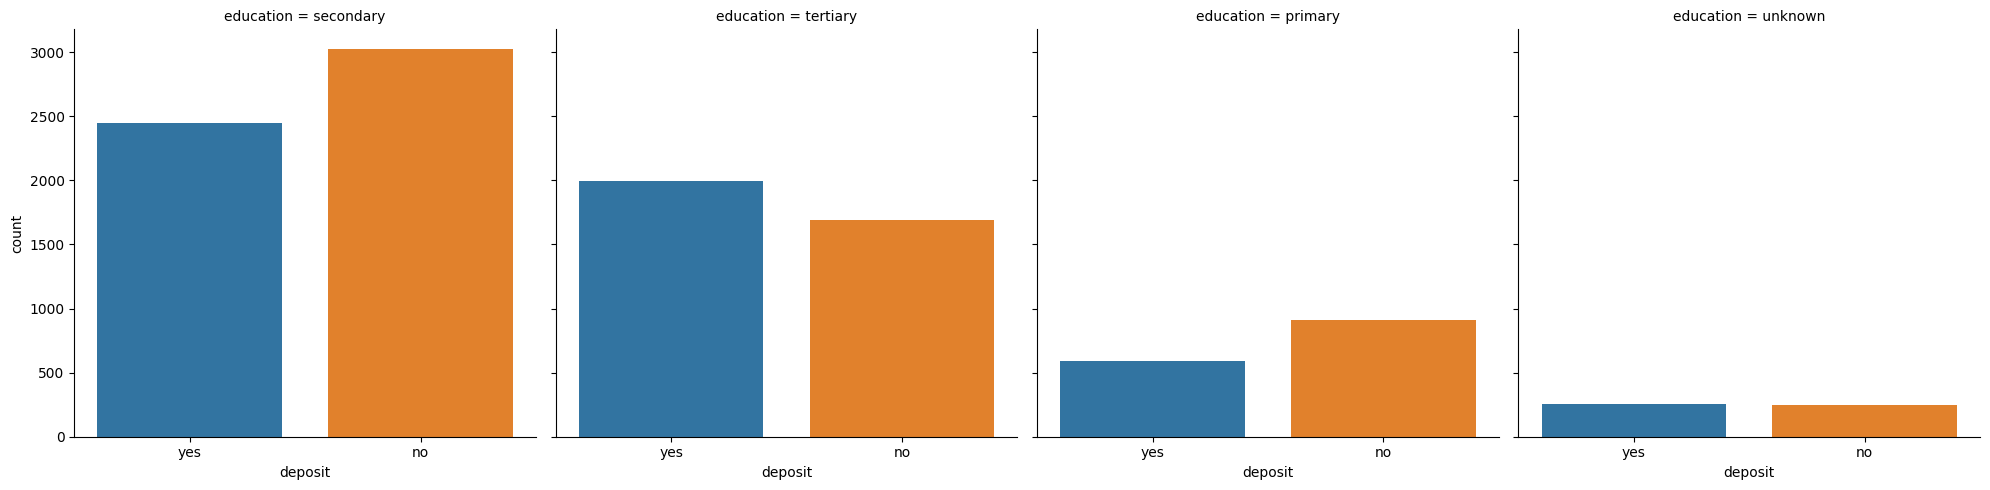

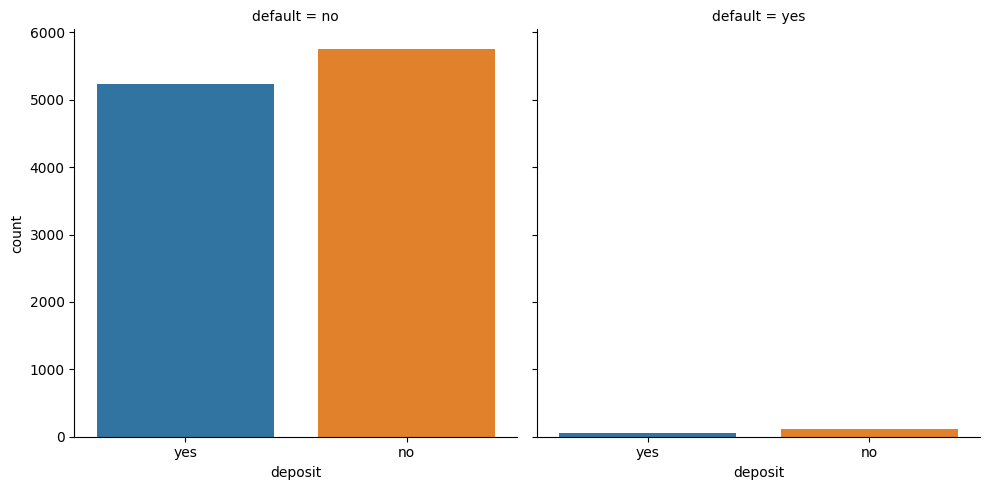

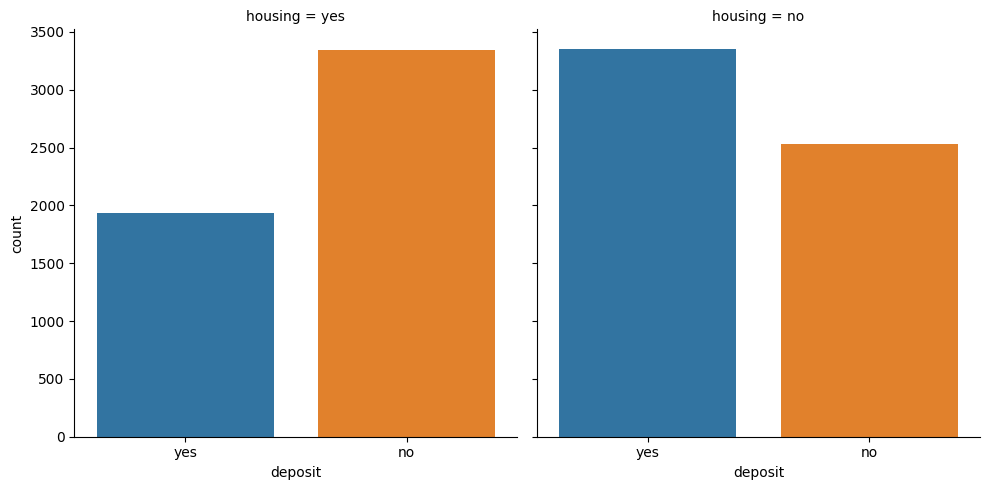

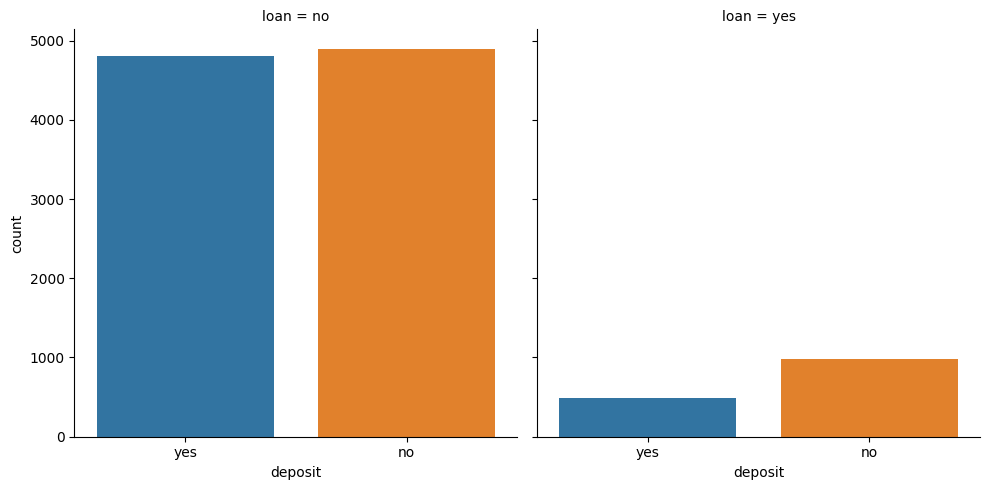

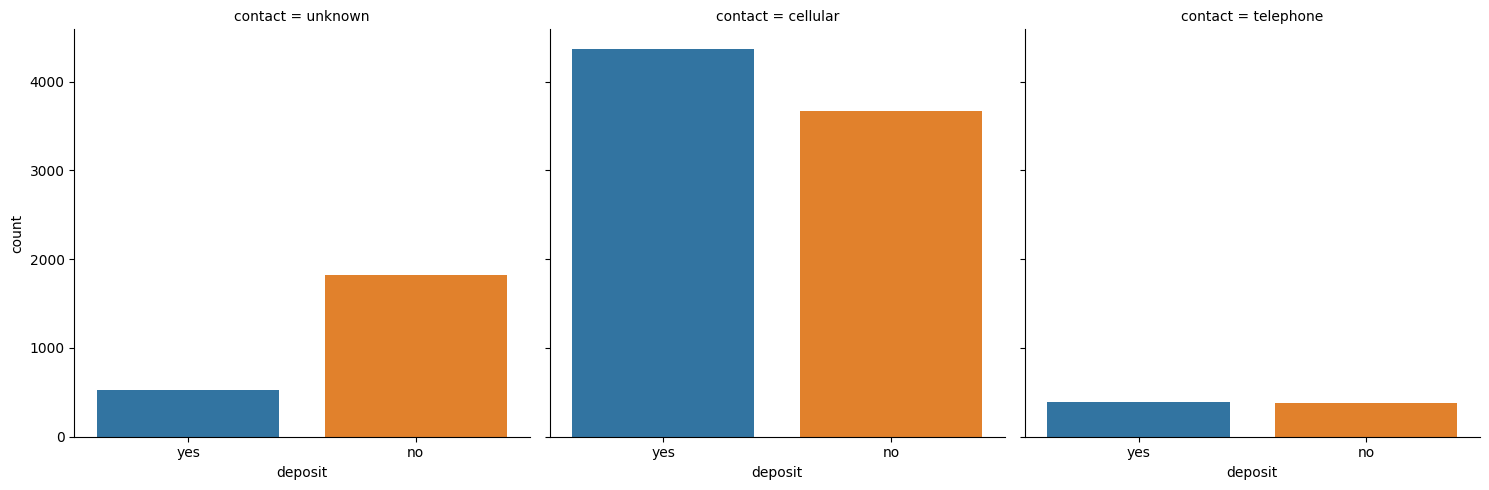

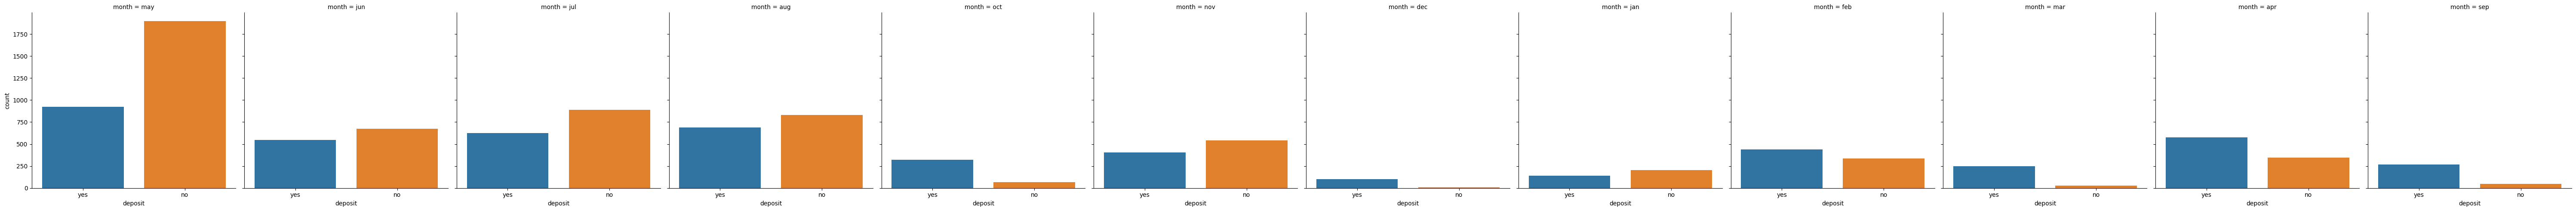

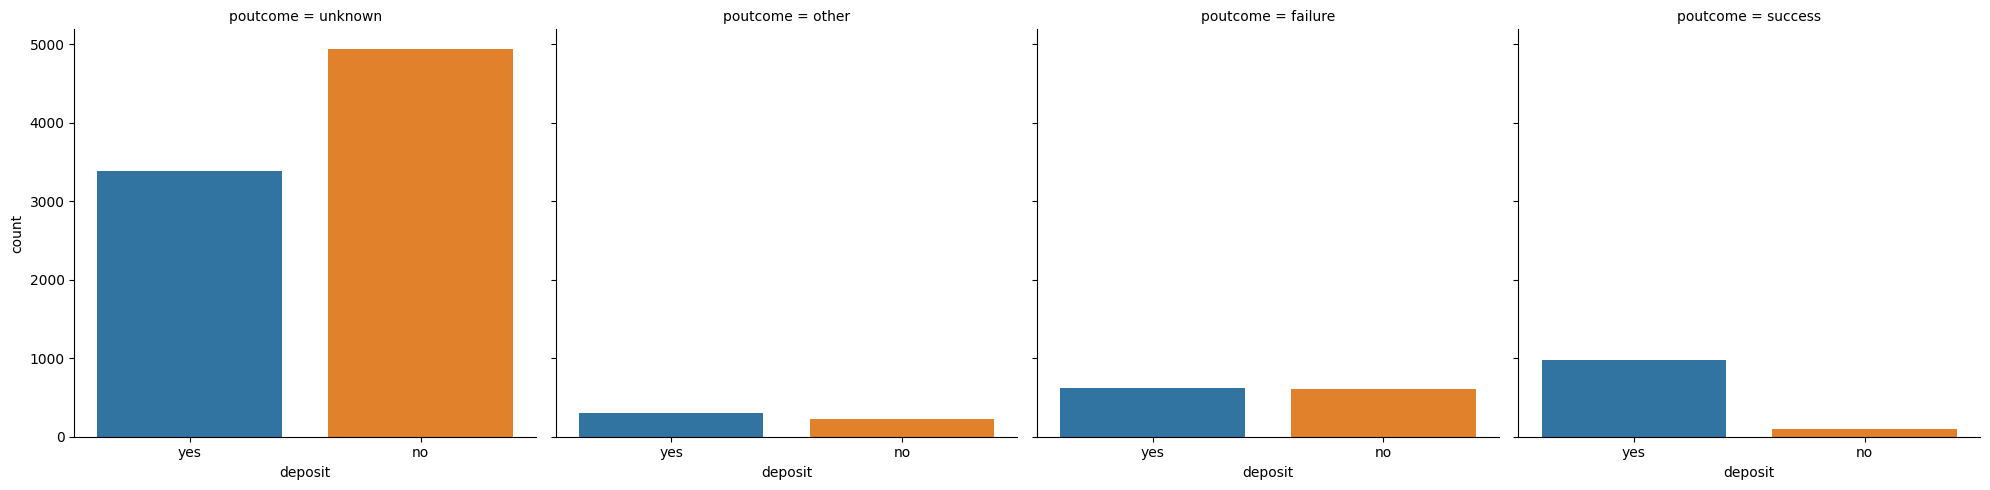

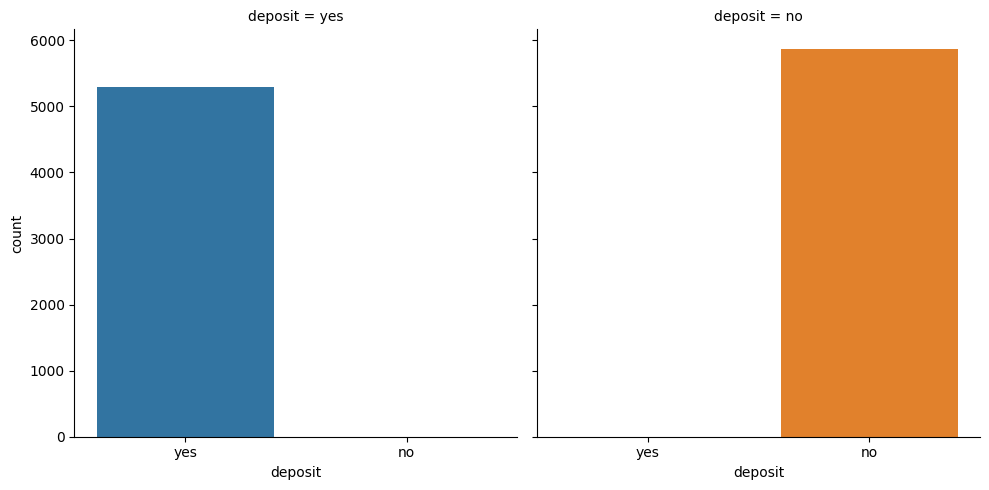

In [ ]:
for categorical_feature in categorical_cols:
    sns.catplot(x='deposit', col=categorical_feature, kind='count', data= df)
plt.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

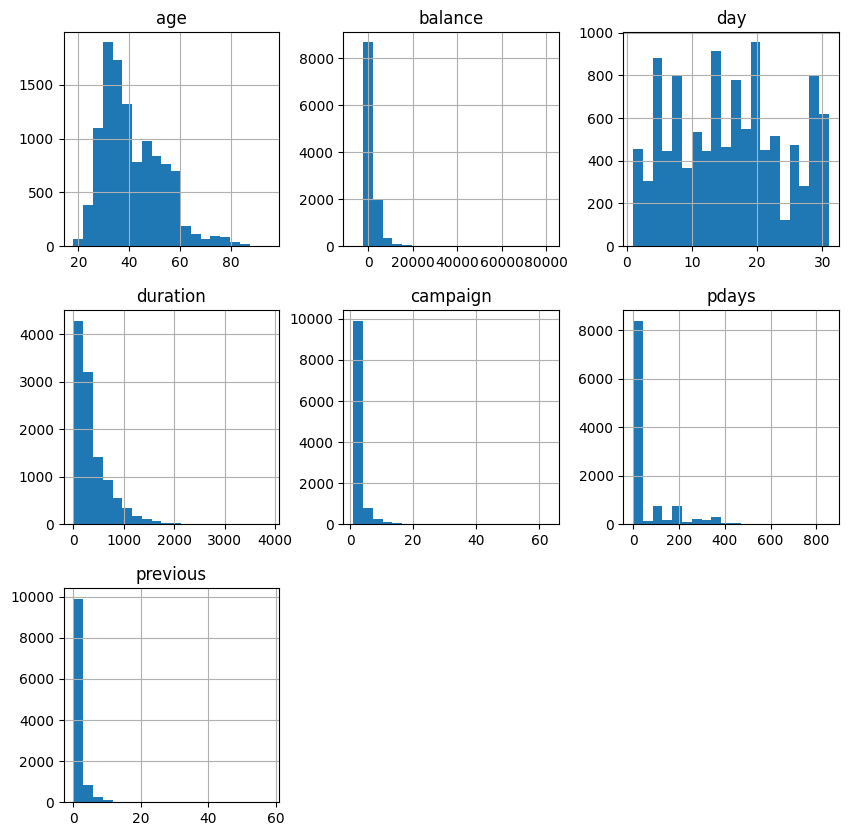

In [ ]:
df.hist(figsize=(10,10),bins=20)

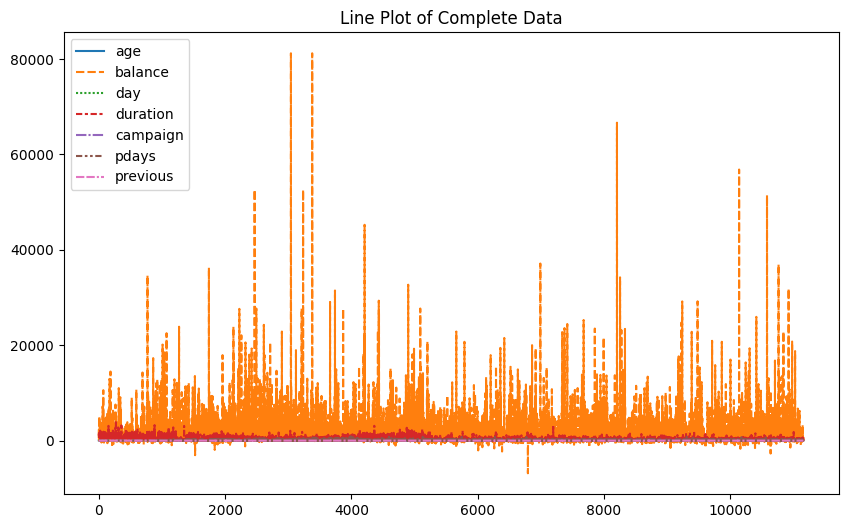

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(df)
plt.title("Line Plot of Complete Data")
plt.show()

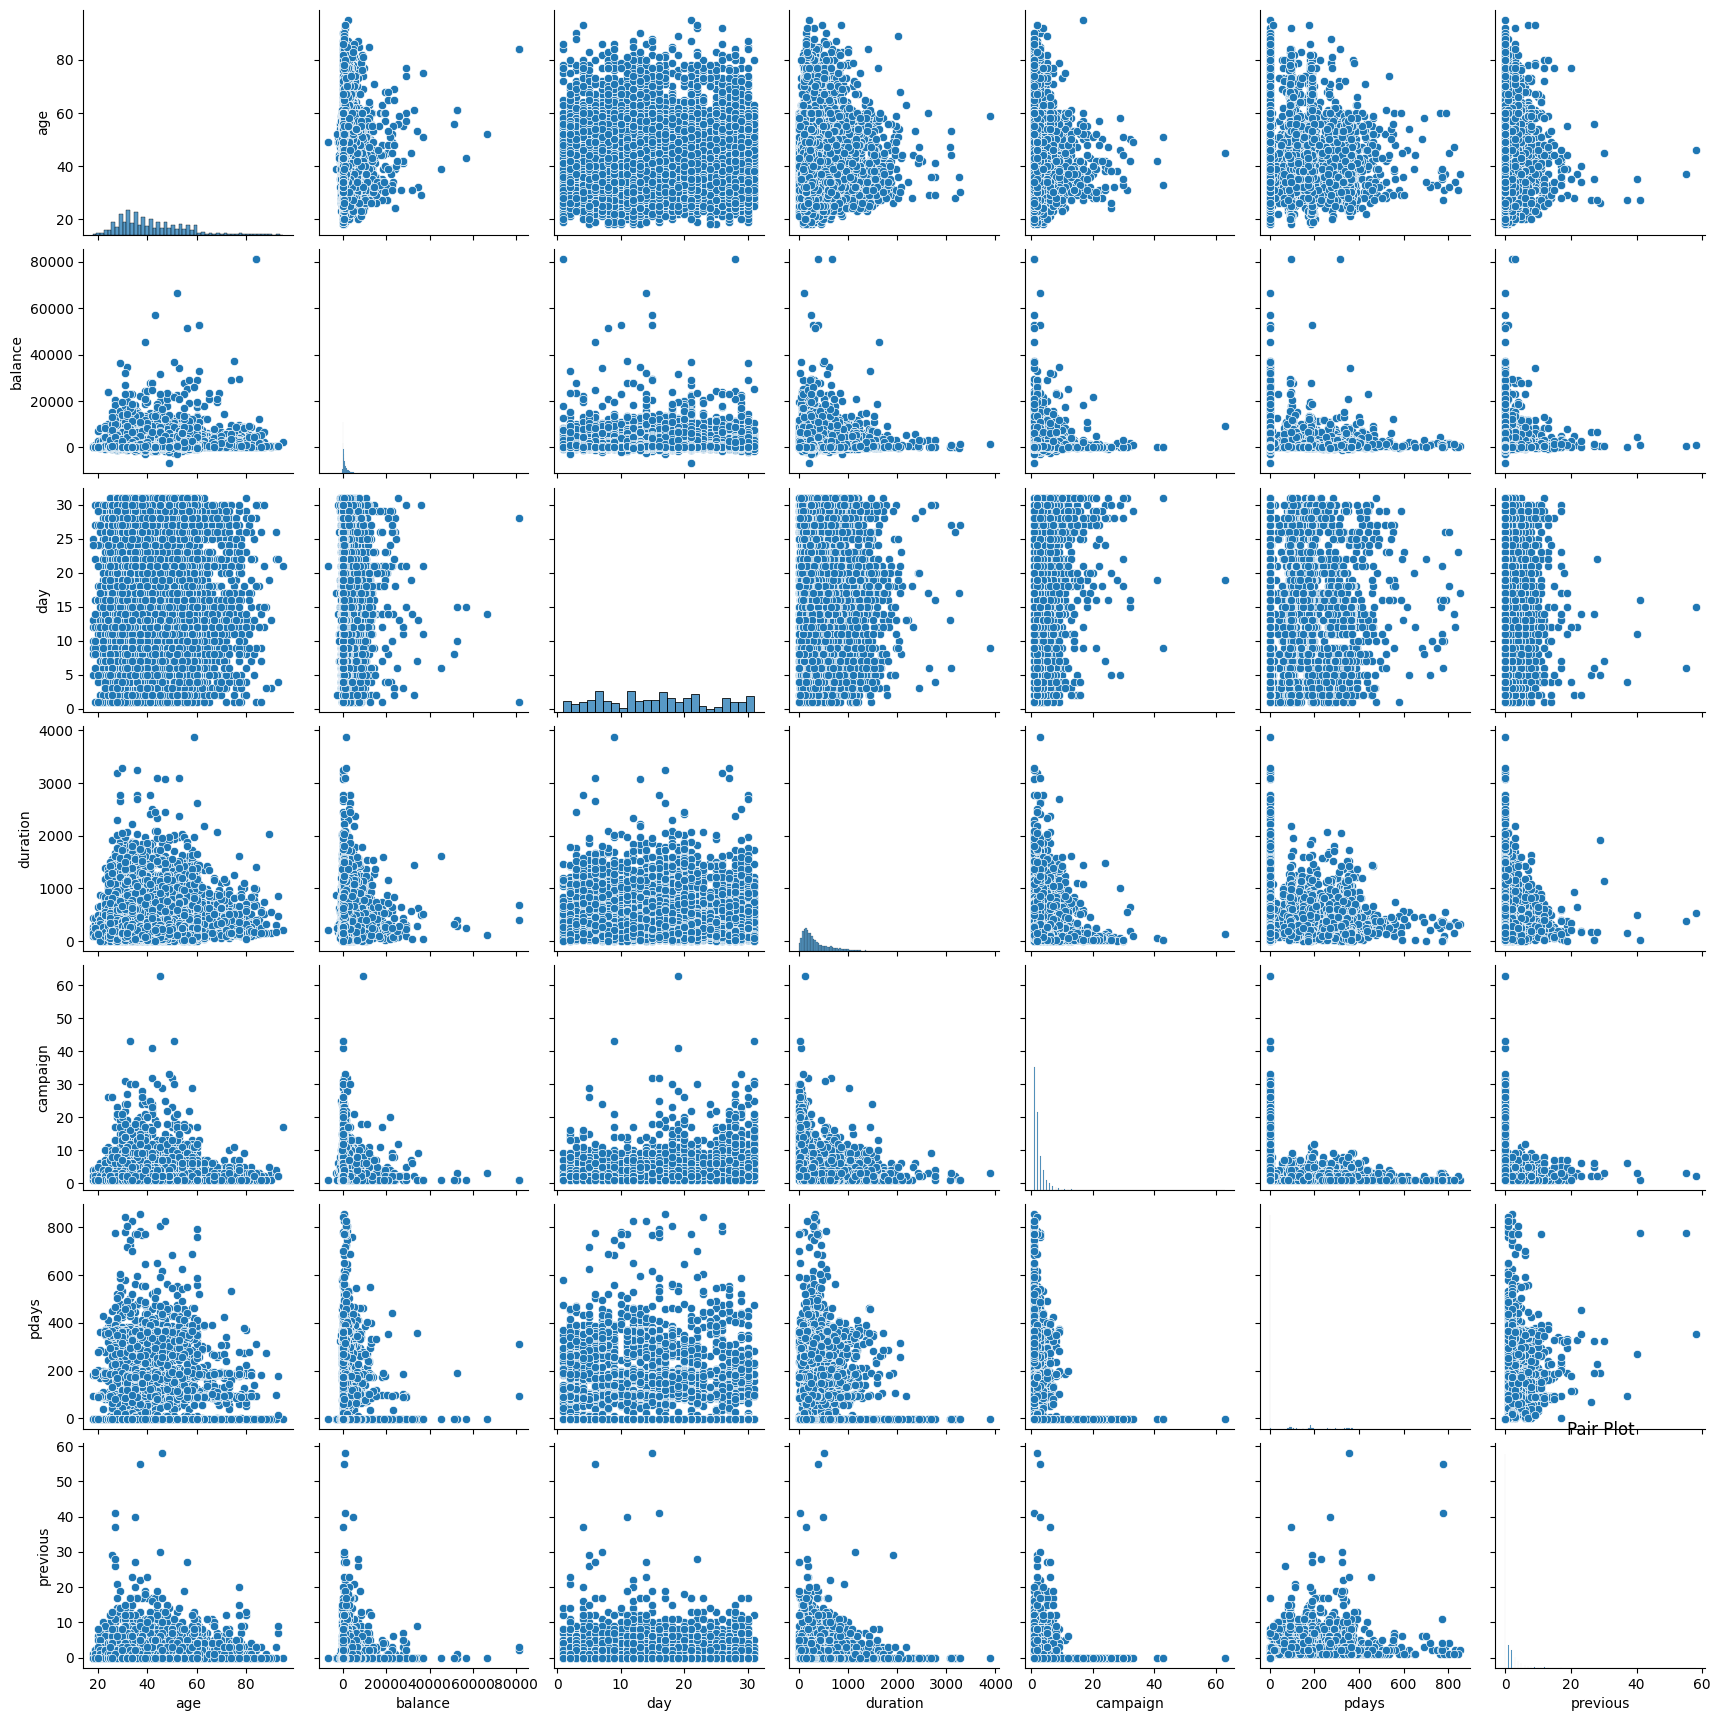

In [ ]:
sns.pairplot(data=df)
plt.title("Pair Plot")
plt.show()

Corr_matrix of Numerical features

<ipython-input-24-1bca07b45bcf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df.corr()


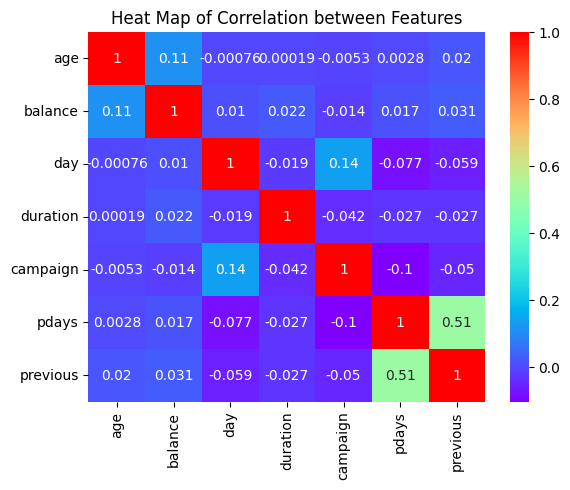

In [ ]:
cor_matrix = df.corr()

sns.heatmap(data=cor_matrix,annot=True,cmap='rainbow')
plt.title("Heat Map of Correlation between Features")
plt.show()

# Encoding categorical Features of the data-set

In [ ]:
lb = LabelEncoder()

In [ ]:
for column in df.columns:
  df[column]=lb.fit_transform(df[column])

In [ ]:
df

age  job  marital  education  default  balance  housing  loan  contact  \
0       41    0        1          1        0     2288        1     0        2   
1       38    0        1          1        0      469        0     0        2   
2       23    9        1          1        0     1618        1     0        2   
3       37    7        1          1        0     2356        1     0        2   
4       36    0        1          2        0      608        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
11157   15    1        2          0        0      425        1     0        0   
11158   21    7        1          1        0     1149        0     0        2   
11159   14    9        2          1        0      453        0     0        0   
11160   25    9        1          1        0      424        0     1        0   
11161   16    9        1          1        0      424        0     0        0   

       day  month  duration  campaign  pdays  previous  poutcome  deposit  
0        4      8      1021         0      0         0         3        1  
1        4      8      1283         0      0         0         3        1  
2        4      8      1246         0      0         0         3        1  
3        4      8       577         0      0         0         3        1  
4        4      8       671         1      0         0         3        1  
...    ...    ...       ...       ...    ...       ...       ...      ...  
11157   19      0       255         0      0         0         3        0  
11158   15      6        81         3      0         0         3        0  
11159   18      1       154         1      0         0         3        0  
11160    7      8         7         1    155         5         0        0  
11161    8      5       626         0      0         0         3        0  

[11162 rows x 17 columns]

In [ ]:
cor_matrix = df.corr()

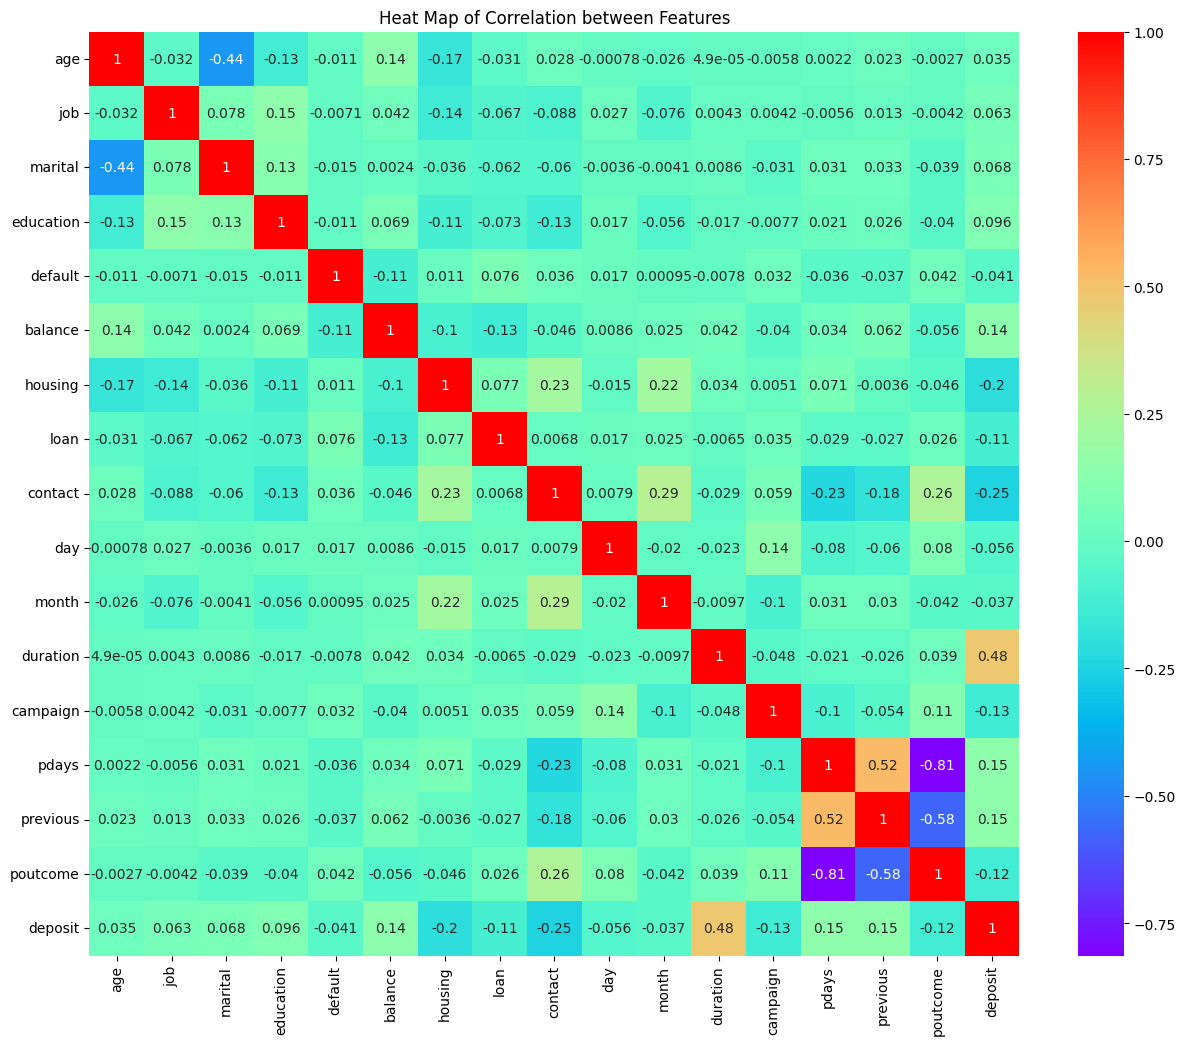

In [ ]:
plt.figure(figsize=(15, 12))

# Create the heatmap
sns.heatmap(data=cor_matrix, annot=True, cmap='rainbow')
plt.title("Heat Map of Correlation between Features")
plt.show()

In [ ]:
df.drop(columns=['month','poutcome','campaign','day','default'],axis=1,inplace=True)

In [ ]:
df

age  job  marital  education  balance  housing  loan  contact  \
0       41    0        1          1     2288        1     0        2   
1       38    0        1          1      469        0     0        2   
2       23    9        1          1     1618        1     0        2   
3       37    7        1          1     2356        1     0        2   
4       36    0        1          2      608        0     0        2   
...    ...  ...      ...        ...      ...      ...   ...      ...   
11157   15    1        2          0      425        1     0        0   
11158   21    7        1          1     1149        0     0        2   
11159   14    9        2          1      453        0     0        0   
11160   25    9        1          1      424        0     1        0   
11161   16    9        1          1      424        0     0        0   

       duration  pdays  previous  deposit  
0          1021      0         0        1  
1          1283      0         0        1  
2          1246      0         0        1  
3           577      0         0        1  
4           671      0         0        1  
...         ...    ...       ...      ...  
11157       255      0         0        0  
11158        81      0         0        0  
11159       154      0         0        0  
11160         7    155         5        0  
11161       626      0         0        0  

[11162 rows x 12 columns]

In [ ]:
df.describe()

age           job       marital     education       balance  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      23.231410      4.487905      1.199337      1.285164   1327.318043   
std       11.911048      3.225132      0.625552      0.749478    965.056807   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       14.000000      1.000000      1.000000      1.000000    546.000000   
50%       21.000000      4.000000      1.000000      1.000000    973.000000   
75%       31.000000      7.000000      2.000000      2.000000   1928.000000   
max       75.000000     11.000000      2.000000      3.000000   3804.000000   

            housing          loan       contact      duration         pdays  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean       0.473123      0.130801      0.489697    359.711521     46.133668   
std        0.499299      0.337198      0.818724    308.647769     95.289292   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000    136.000000      0.000000   
50%        0.000000      0.000000      0.000000    253.000000      0.000000   
75%        1.000000      0.000000      1.000000    494.000000     14.750000   
max        1.000000      1.000000      2.000000   1427.000000    471.000000   

           previous       deposit  
count  11162.000000  11162.000000  
mean       0.824673      0.473840  
std        2.156619      0.499338  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        1.000000      1.000000  
max       33.000000      1.000000

# Model Tunning

In [ ]:
Q1 = np.percentile(df, 25)
Q3 = np.percentile(df, 75)

IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

data_without_outliers = df[(df >= lower_bound) & (df <= upper_bound)]

In [ ]:
data_without_outliers.head()

age  job  marital  education  balance  housing  loan  contact  duration  \
0   NaN    0        1          1      NaN        1     0        2       NaN   
1   NaN    0        1          1      NaN        0     0        2       NaN   
2  23.0    9        1          1      NaN        1     0        2       NaN   
3   NaN    7        1          1      NaN        1     0        2       NaN   
4   NaN    0        1          2      NaN        0     0        2       NaN   

   pdays  previous  deposit  
0    0.0         0        1  
1    0.0         0        1  
2    0.0         0        1  
3    0.0         0        1  
4    0.0         0        1

In [ ]:
print(data_without_outliers.shape)


(11162, 12)


In [ ]:
target = "deposit"
predictors = set(df.columns) - set([target])
print("df.shape:",df.shape)
df[predictors].head()

df.shape: (11162, 12)


<ipython-input-39-8384527ef806>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[predictors].head()


age  marital  balance  housing  loan  previous  education  job  pdays  \
0   41        1     2288        1     0         0          1    0      0   
1   38        1      469        0     0         0          1    0      0   
2   23        1     1618        1     0         0          1    9      0   
3   37        1     2356        1     0         0          1    7      0   
4   36        1      608        0     0         0          2    0      0   

   contact  duration  
0        2      1021  
1        2      1283  
2        2      1246  
3        2       577  
4        2       671

In [ ]:
df[predictors].shape

<ipython-input-40-b2f1782396c1>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[predictors].shape


(11162, 11)

In [ ]:
X_train,X_test, Y_train,Y_test = train_test_split(df[predictors],df[target],test_size= 0.2,random_state=42)

<ipython-input-41-1cb7e807d10f>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train,X_test, Y_train,Y_test = train_test_split(df[predictors],df[target],test_size= 0.2,random_state=42)


## Applying Smote

In [ ]:
sampler = SMOTE()
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, Y_train)

In [ ]:
y_train_resampled.value_counts()

1    4707
0    4707
Name: deposit, dtype: int64

In [ ]:
X_train_resampled.columns

Index(['age', 'marital', 'balance', 'housing', 'loan', 'previous', 'education',
       'job', 'pdays', 'contact', 'duration'],
      dtype='object')

## Training ML Models

In [ ]:
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_resampled ,y_train_resampled)
y_pred = lr.predict(X_test)
y_pred_probs = lr.predict_proba(X_test)[:, 1]
LogisticRegression_accuracy = lr.score(X_test,Y_test)
print(LogisticRegression_accuracy)

0.7877295118674429


### Confusion Matrix

In [ ]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[932, 234],
       [240, 827]])

### ROC Curve

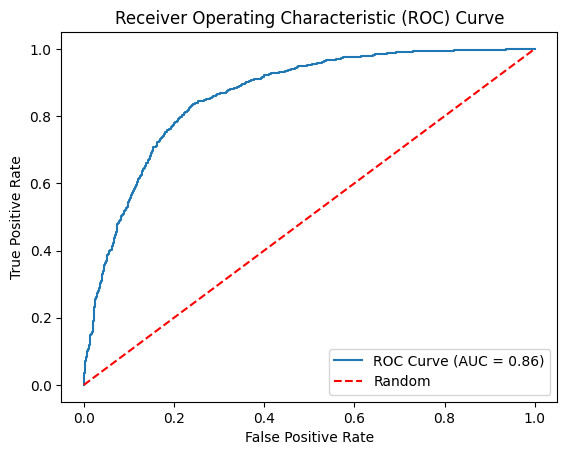

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_probs)
lr_auc = roc_auc_score(Y_test, y_pred_probs)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(lr_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
results=[]

In [ ]:
results.append(('Logistic_Regression',lr_auc))

# Cross Validation

In [ ]:
classifiers = [
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
     xgb.XGBClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
]

with parallel_backend('multiprocessing'):
  for classifier in classifiers:
      scores = cross_val_score(classifier, X_train_resampled, y_train_resampled, cv=6,scoring='roc_auc')
      results.append((classifier.__class__.__name__, scores.mean()))

results.sort(key=lambda x: x[1], reverse=True)

for name, score in results:
    print(f"{name}: {score}")

RandomForestClassifier: 0.8899355203864986
XGBClassifier: 0.8869107197018935
Logistic_Regression: 0.861322281898399
GaussianNB: 0.8327781749642532
SVC: 0.8299273690367869
KNeighborsClassifier: 0.8150564365873739
DecisionTreeClassifier: 0.7467593645738551


# Ensemble Learning

In [ ]:
clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier()
clf3 = xgb.XGBClassifier()
clf4 = RandomForestClassifier()

ensemble_model = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('xbg', clf3),('rfc',clf4)], voting='hard')

with parallel_backend('multiprocessing'):
  ensemble_model.fit(X_train, Y_train)
  y_pred = ensemble_model.predict(X_test)

ensemble_learning = roc_auc_score(Y_test, y_pred)
results.append(('Ensemble Learning',ensemble_learning))
print("Validation Accuracy:", ensemble_learning)

Validation Accuracy: 0.7947516401124648


In [ ]:
X_train.columns

Index(['age', 'marital', 'balance', 'housing', 'loan', 'previous', 'education',
       'job', 'pdays', 'contact', 'duration'],
      dtype='object')

In [ ]:
X=df.drop('deposit',axis=1)

# PCA

In [ ]:
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)
pca_2d

array([[ 970.32018662,  647.2158322 ],
       [-844.55443683,  936.30685307],
       [ 303.731696  ,  882.18081724],
       ...,
       [-877.45942729, -192.28980179],
       [-908.10599743, -340.02106501],
       [-899.40094598,  280.07595496]])

In [ ]:
clustering_score = []

# Kmeans Clustering

In [ ]:
twss=[]
sa=[]

In [ ]:
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init= 'k-means++')
    kmeans.fit(X)
    Ypreds=kmeans.predict(X)
    twss.append(kmeans.inertia_)
    if i>1:
        sa.append(silhouette_score(X, Ypreds))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

## Elbow Method

Text(0, 0.5, 'Total within-cluster sum of squares')

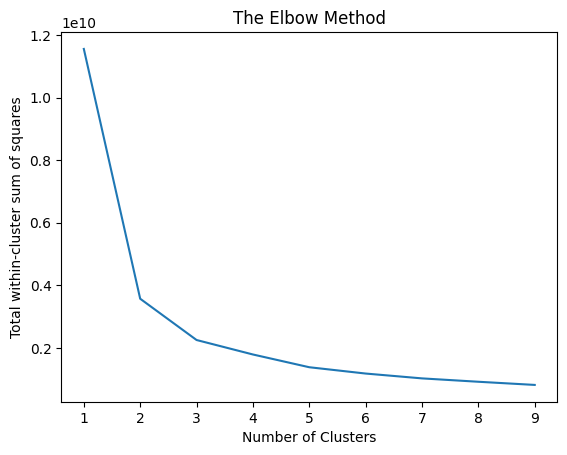

In [ ]:
plt.plot(range(1,10),twss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Total within-cluster sum of squares')

## Silhouette analysis

Text(0, 0.5, 'Average silhouette score')

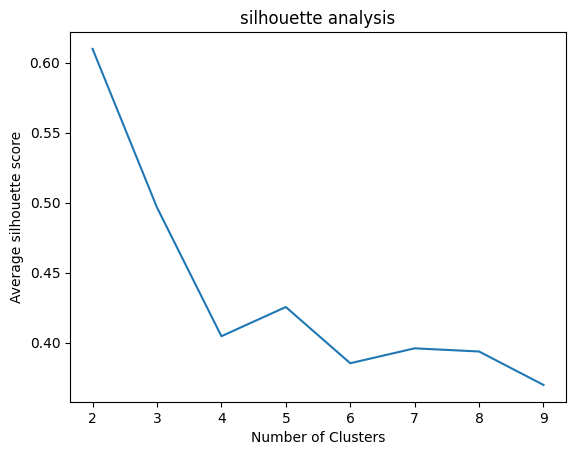

In [ ]:
plt.plot(range(2,10),sa)
plt.title('silhouette analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Average silhouette score')

## Taking Number of clusters as 2

In [ ]:
kmeans = KMeans(n_clusters=2, init= 'k-means++', random_state=42)

In [ ]:
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [ ]:
Ypreds=kmeans.predict(X)

### 2D Plot

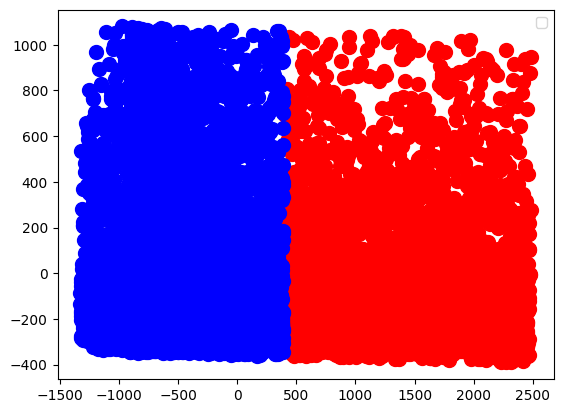

In [ ]:
plt.scatter(pca_2d[Ypreds == 0, 0], pca_2d[Ypreds == 0, 1], s = 100, c = 'red')
plt.scatter(pca_2d[Ypreds == 1, 0], pca_2d[Ypreds == 1, 1], s = 100, c = 'blue')

plt.legend()

### 3D plot

In [ ]:
X1 = X.values
kmeans_labels = kmeans.labels_

centroids = kmeans.cluster_centers_

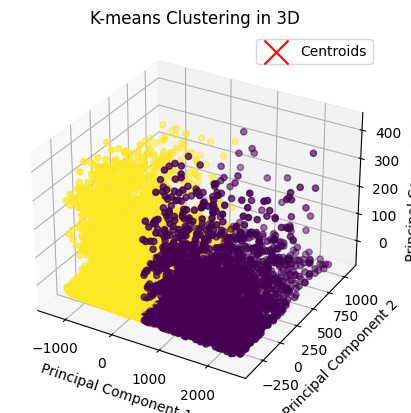

In [ ]:
pca_3d = PCA(n_components=3).fit(X)
X_3d = pca_3d.transform(X)

# Plotting the 3D scatter plot with K-means cluster assignments and centroids
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=kmeans_labels)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', color='red', s=300, label='Centroids')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('K-means Clustering in 3D')
ax.legend()
plt.show()

### Silhouette Score

In [ ]:
kmeans_score = silhouette_score(X1, kmeans_labels)
clustering_score.append(('KMeans Clustering score',kmeans_score))
print("Silhouette Score for Kmeans:", kmeans_score)

Silhouette Score for Kmeans: 0.6096850819728666


# DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=5)

dbscan.fit(X1)
# Assuming you have already defined X1 and the DBSCAN code as provided.
DBSCAN_labels = dbscan.labels_
unique_labels = np.unique(DBSCAN_labels)


## 2D Plot

In [ ]:
pca_2d = PCA(n_components=2).fit(X1)
X_pca_2d = pca_2d.transform(X1)

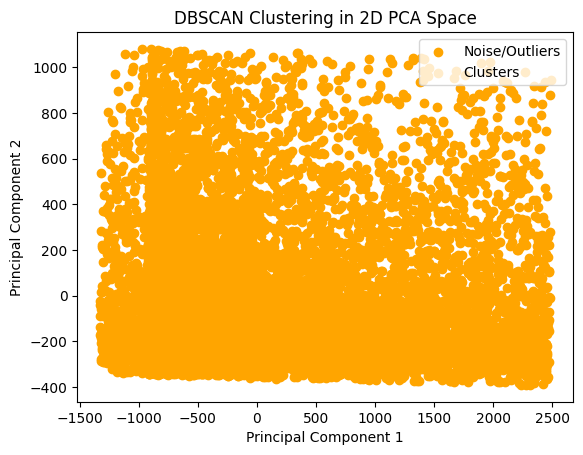

In [ ]:
plt.scatter(X_pca_2d[DBSCAN_labels == -1, 0], X_pca_2d[DBSCAN_labels == -1, 1], c='orange', label='Noise/Outliers')
plt.scatter(X_pca_2d[DBSCAN_labels != -1, 0], X_pca_2d[DBSCAN_labels != -1, 1], c=DBSCAN_labels[DBSCAN_labels != -1], cmap='viridis', label='Clusters')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering in 2D PCA Space')
plt.legend()
plt.show()

## 3D Plot

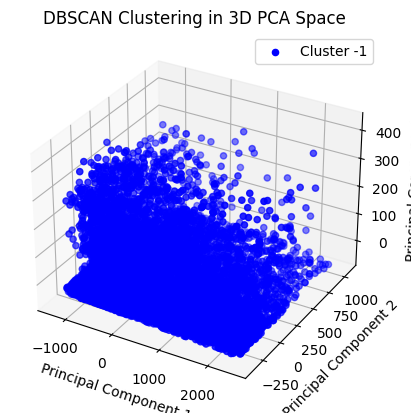

In [ ]:
pca_3d = PCA(n_components=3).fit(X1)
X_pca_3d = pca_3d.transform(X1)

# Plot the 3D DBSCAN clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for label in unique_labels:
    if label == -1:
        color = 'b'
    else:
        color = np.random.rand(3,)

    cluster_points = X_pca_3d[DBSCAN_labels == label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=color, label=f'Cluster {label}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('DBSCAN Clustering in 3D PCA Space')
ax.legend()
plt.show()

# Gaussian Mixture

## 2D Plot

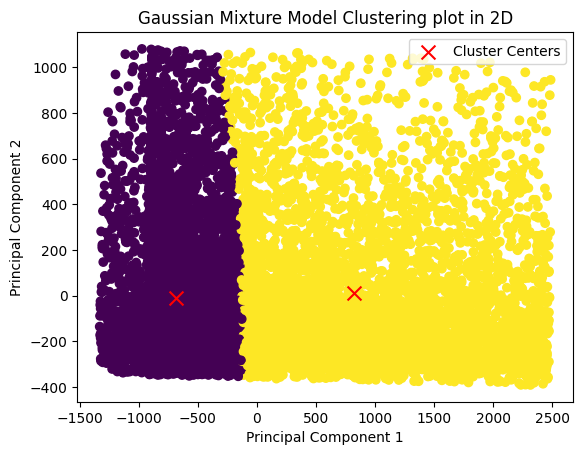

In [ ]:

# Apply PCA to transform the data into 2D
pca_2d = PCA(n_components=2).fit(X1)
X_pca_2d = pca_2d.transform(X1)

# Fit Gaussian Mixture Model to the PCA-transformed data
gmm = GaussianMixture(n_components=2)
gmm.fit(X_pca_2d)
gmm_labels = gmm.predict(X_pca_2d)
means = gmm.means_

# Plot the 2D GMM clusters
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=gmm_labels, cmap='viridis')
plt.scatter(means[:, 0], means[:, 1], marker='x', color='red', s=100, label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Gaussian Mixture Model Clustering plot in 2D')
plt.legend()
plt.show()


## 3D Plot

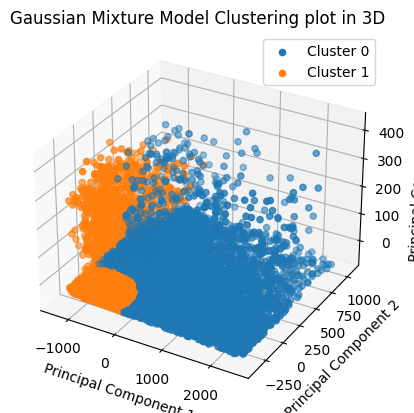

In [ ]:

# Apply PCA to transform the data into 3D
pca_3d = PCA(n_components=3).fit(X1)
X_pca_3d = pca_3d.transform(X1)

# Fit Gaussian Mixture Model to the PCA-transformed data
gmm = GaussianMixture(n_components=2)
gmm.fit(X_pca_3d)
gmm_labels = gmm.predict(X_pca_3d)

# Get unique cluster labels
unique_labels = np.unique(gmm_labels)

# Plot the 3D GMM clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for label in unique_labels:
    cluster_points = X_pca_3d[gmm_labels == label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {label}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Gaussian Mixture Model Clustering plot in 3D')
ax.legend()
plt.show()


## Silhouette Score

In [ ]:
gmm_score = silhouette_score(X1, gmm_labels)
clustering_score.append(('GMM Clustering score',gmm_score))
print("Silhouette Score for GMM Clustering:", gmm_score)

Silhouette Score for GMM Clustering: 0.3325237351312211


# Hierarchical Clustering

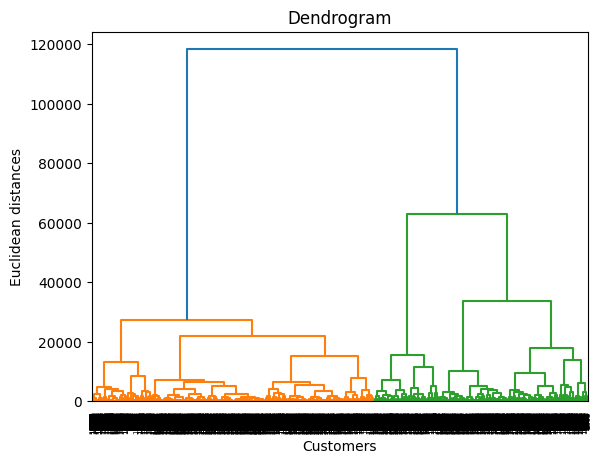

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## 2D Plot

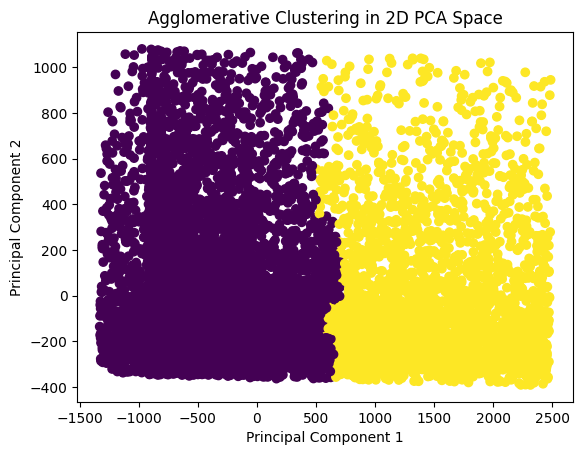

In [ ]:

# Apply PCA to transform the data into 2D
pca_2d = PCA(n_components=2).fit(X1)
X_pca_2d = pca_2d.transform(X1)

# Fit Agglomerative Clustering to the PCA-transformed data
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_clustering.fit_predict(X_pca_2d)

# Plot the 2D Agglomerative Clustering result
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=agg_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering in 2D PCA Space')
plt.show()


## Silhouette Score

In [ ]:
agg_score = silhouette_score(X1, agg_labels)
clustering_score.append(('Agglomerative Clustering score',agg_score))
print("Silhouette Score for Agglomerative Clustering:", agg_score)

Silhouette Score for Agglomerative Clustering: 0.6105583634251556


# MlFlow

In [ ]:

mlflow.start_run(nested=True)
# Log the parameters
mlflow.log_param('n_estimators', 100)
mlflow.log_param('max_depth', 5)
# Define and train the model
model = RandomForestClassifier(n_estimators=100, max_depth=5)
model.fit(X_train, Y_train)

# Log the accuracy metric
accuracy = model.score(X_test, Y_test)
mlflow.log_metric('accuracy', accuracy)

# Save the model
mlflow.sklearn.save_model(model, 'model')

# Log artifacts (optional)
# mlflow.log_artifact('preprocessing_script.py')

mlflow.end_run()

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


# Accuracy result of both Classification models and Clustering models

In [ ]:
print(results)
print(clustering_score)

[('RandomForestClassifier', 0.8899355203864986), ('XGBClassifier', 0.8869107197018935), ('Logistic_Regression', 0.861322281898399), ('GaussianNB', 0.8327781749642532), ('SVC', 0.8299273690367869), ('KNeighborsClassifier', 0.8150564365873739), ('DecisionTreeClassifier', 0.7467593645738551), ('Ensemble Learning', 0.7947516401124648)]
[('KMeans Clustering score', 0.6096850819728666), ('GMM Clustering score', 0.3325237351312211), ('Agglomerative Clustering score', 0.6105583634251556)]


In [ ]:
best_result_for_classification = max(results,key = lambda x : x[1])
print(best_result_for_classification)

('RandomForestClassifier', 0.8899355203864986)


In [ ]:
best_result_for_clustering = max(clustering_score,key = lambda x : x[1])
print(best_result_for_clustering)

('Agglomerative Clustering score', 0.6105583634251556)


# Creating pkl files

PKL files, short for "pickle files," are a serialized form of Python objects that have been converted into a byte stream. The primary use of PKL files is to save Python objects (e.g., data structures, models, configurations) to disk and later load them back into memory when needed. Pickling is a way to convert complex Python objects into a format that can be easily stored and retrieved.

In [ ]:
with open('classification_accuracy.pkl', 'wb') as f:
    pickle.dump(best_result_for_classification, f)

with open('clustering_accuracy.pkl', 'wb') as f:
    pickle.dump(best_result_for_clustering, f)

In [ ]:
model1 = RandomForestClassifier()

In [ ]:
model2 = kmeansmodel2 = agg_clustering

In [ ]:
with open('model2.pkl', 'wb') as f:
    pickle.dump(model2, f)

In [ ]:
with open('model1.pkl', 'wb') as f:
    pickle.dump(model1, f)

In [ ]:
files.download('classification_accuracy.pkl')
files.download('clustering_accuracy.pkl')
files.download('model1.pkl')
files.download('model2.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>